In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


In [2]:
#load data
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

df.shape #lets check the dimensionality of the raw data

(12684, 26)

# Data Exploration
Let's take a peek into the data and explore the data and its variables. The dataset is a supervised learning dataset with over 12000 instances and 26 attributes; this mean there is an input variable X and an out variable y.  

In [3]:
#load the data to understand the attributes and data types
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
#let's look at the data types
df.dtypes 

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

It seems that the data has some few numberical datatypes and the rest are string objects, however all the data can be categorized as being categorical datatypes with a mix of binary and ordinal datatypes.

In [5]:
#change temperature into a category as its an ordinal datatype
df['temperature']=df['temperature'].astype('category')

# Cleaning The Data

In [6]:
#check for empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  category
 4   time                  12684 non-null  object  
 5   coupon                12684 non-null  object  
 6   expiration            12684 non-null  object  
 7   gender                12684 non-null  object  
 8   age                   12684 non-null  object  
 9   maritalStatus         12684 non-null  object  
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  object  
 12  occupation            12684 non-null  object  
 13  income                12684 non-null  object  
 14  car                   108 non-null    object  
 15  Ba

There are some missing values in several columns, and the 'car' variable has only 108 non-null values, more than 99% of the values are NaN. We can just drop it off. These variables are insufficient so its best to remove it completely from the data to avoid inaccuracies in the modeling.

In [7]:
df["car"].value_counts()

Scooter and motorcycle                      22
do not drive                                22
Mazda5                                      22
Car that is too old to install Onstar :D    21
crossover                                   21
Name: car, dtype: int64

In [8]:
df.drop('car', inplace=True, axis=1)

Empty values in categorical data can be removed or replaced with the most frequent value in each column.

Lets iterate through the pandas table and get all the columns with empty or NaN values, and then for each column the code is going to find the largest variable count and fill the empty values with the corresponding variable with maximum count.

In [9]:
for x in df.columns[df.isna().any()]:
    df = df.fillna({x: df[x].value_counts().idxmax()})

In [10]:
#change Object datatypes to Categorical datatypes)

df_obj = df.select_dtypes(include=['object']).copy()

for col in df_obj.columns:
    df[col]=df[col].astype('category')
    
df.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [11]:
#lets do some statistcal analysis
df.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.0,12684,12684,12684,12684,12684,12684,...,12684,12684,12684,12684,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,3.0,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,80.0,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,6528.0,3230,3996,7091,6511,2653,5100,...,3602,4823,5506,6266,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [12]:
df.select_dtypes('int64').nunique()

has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

From the decription above we can tell that 'toCoupon_GEQ5min' has only one unique variable which won't help much in the encoding of the categorical variables. Therefore, its better to drop that column. 

In [13]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)

Let's plot the distribution charts of all the categorical datatypes.

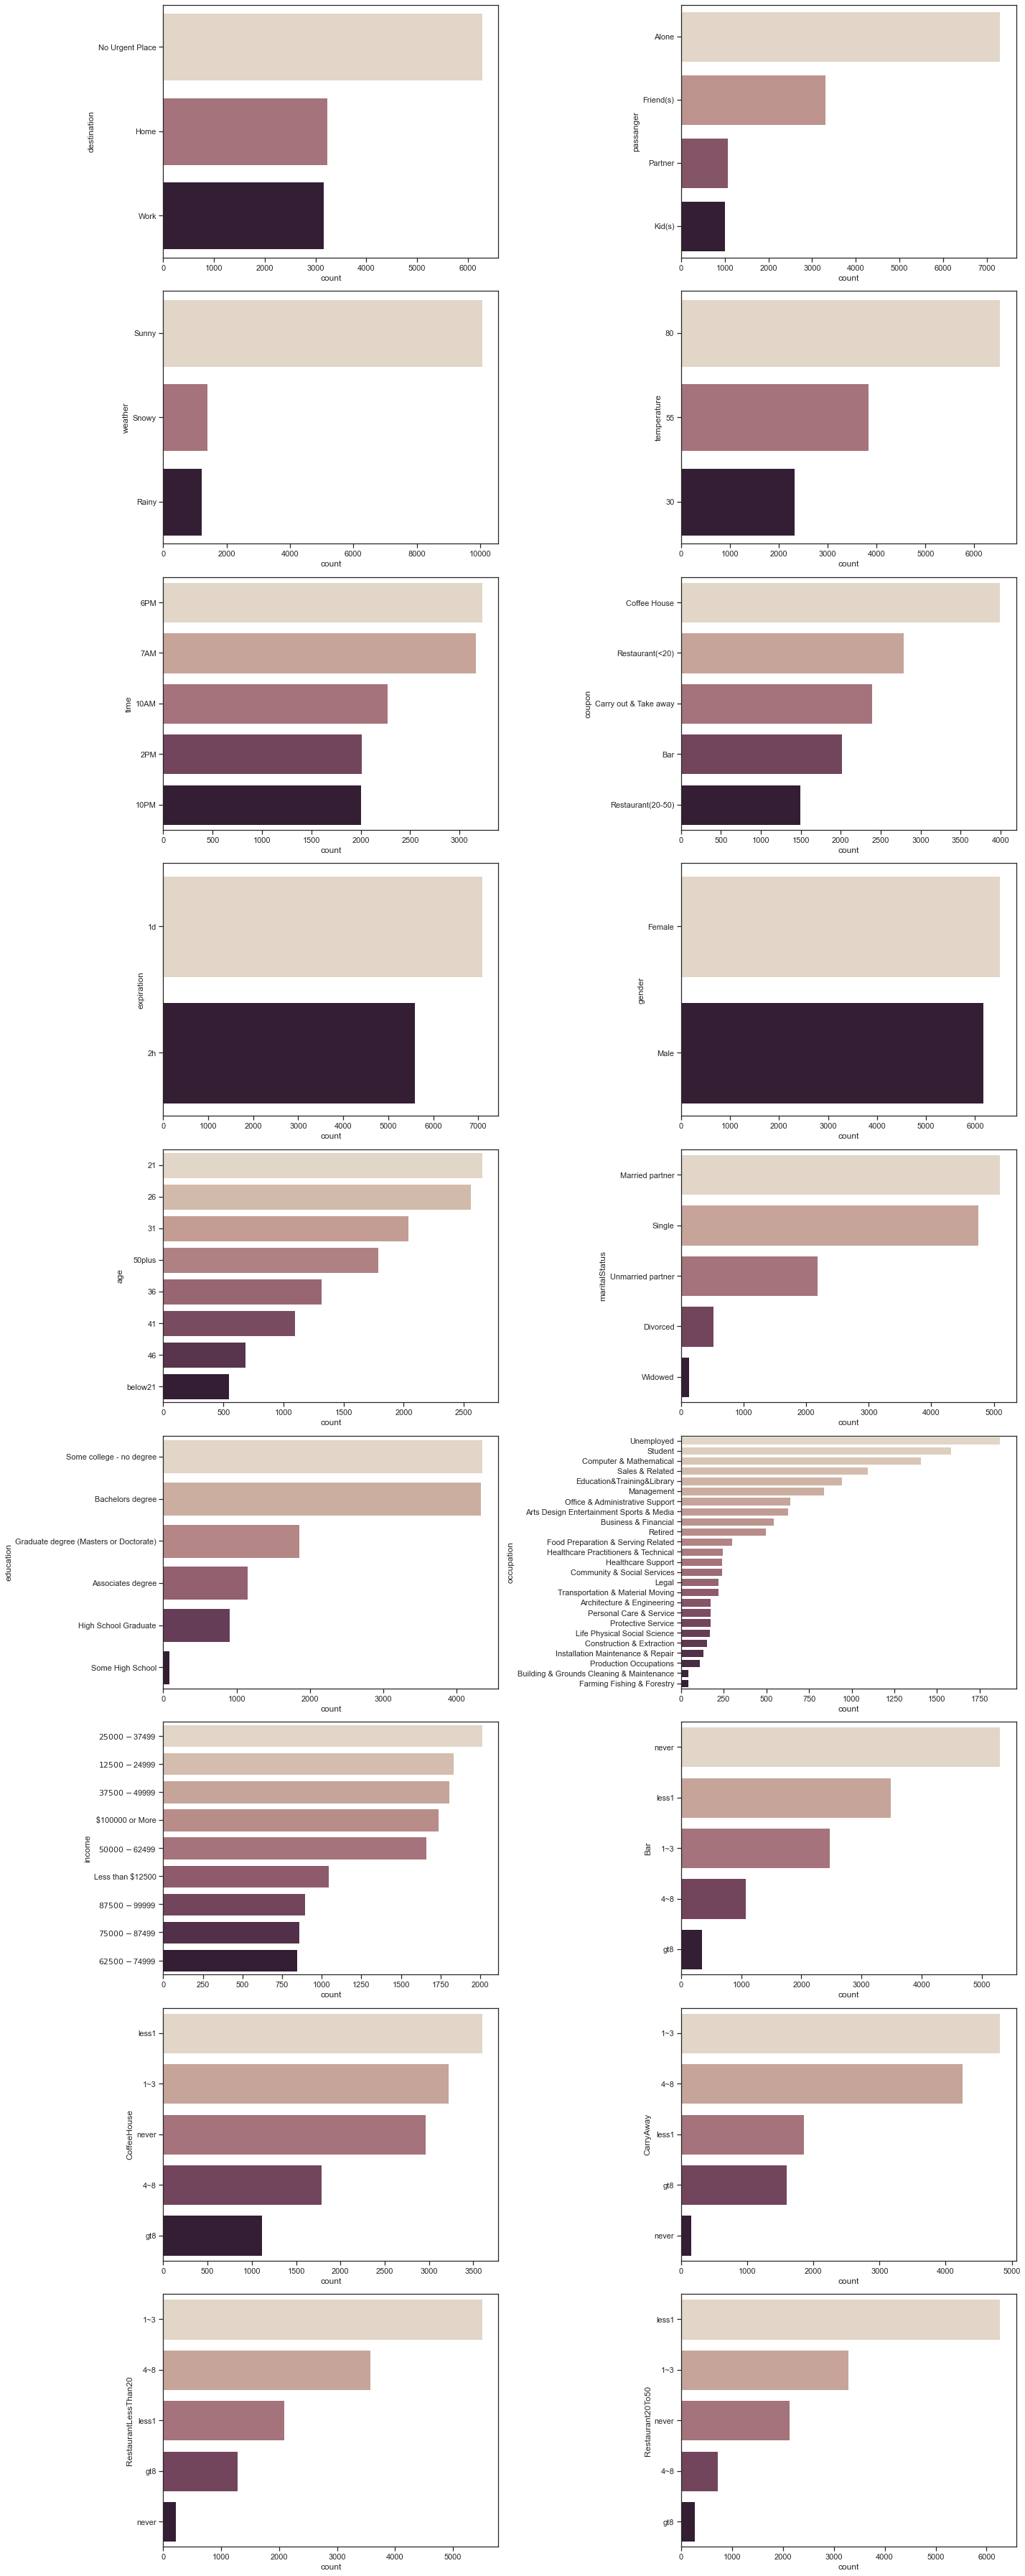

In [14]:
fig, axes = plt.subplots(9, 2, figsize=(20,50))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes('category').columns):
    sns.countplot(y=col, data=df, ax=ax, 
                  palette="ch:.25", order=df[col].value_counts().index);

plt.tight_layout()
plt.show()

We are going to create feature vectors for our modeling by using the LabelEnconder and OneHotEncoder.

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

enc = OneHotEncoder(dtype='int64')

df_cat = df.select_dtypes(include=['category']).copy()
df_int = df.select_dtypes(include=['int64']).copy()

df_enc = pd.DataFrame()
for col in df_cat.columns:
    
    enc_results = enc.fit_transform(df_cat[[col]])

    enc_cat = [col + '_' + str(x) for x in enc.categories_[0]]

    df0 = pd.DataFrame(enc_results.toarray(), columns=enc_cat)

    df_enc = pd.concat([df_enc,df0], axis=1)
    
df_final = pd.concat([df_enc, df_int], axis=1)

df_final

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12680,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
12681,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12682,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0


In [16]:
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
from BOAmodel import *
from collections import defaultdict


In [17]:
""" parameters """
# The following parameters are recommended to change depending on the size and complexity of the data
N = 2000      # number of rules to be used in SA_patternbased and also the output of generate_rules
Niteration = 500  # number of iterations in each chain
Nchain = 2         # number of chains in the simulated annealing search algorithm

supp = 5           # 5% is a generally good number. The higher this supp, the 'larger' a pattern is
maxlen = 3         # maxmum length of a pattern

# \rho = alpha/(alpha+beta). Make sure \rho is close to one when choosing alpha and beta. 
alpha_1 = 500       # alpha_+
beta_1 = 1          # beta_+
alpha_2 = 500         # alpha_-
beta_2 = 1       # beta_-



In [18]:
""" input file """
# # notice that in the example, X is already binary coded. 
# # Data has to be binary coded and the column name shd have the form: attributename_attributevalue
# filepathX = 'tictactoe_X.txt' # input file X
# filepathY = 'tictactoe_Y.txt' # input file Y
# df = read_csv(filepathX,header=0,sep=" ")
# Y = np.loadtxt(open(filepathY,"rb"),delimiter=" ")
df = df_final.iloc[:,:-1].reset_index(drop=True)
Y  = df_final.iloc[:,-1].reset_index(drop=True)

lenY = len(Y)
train_index = sample(range(lenY),int(0.70*lenY))
test_index = [i for i in range(lenY) if i not in train_index]
model = BOA(df.iloc[train_index].reset_index(drop=True), Y.iloc[train_index].reset_index(drop=True))
model.generate_rules(supp, maxlen,N)
model.set_parameters(alpha_1, beta_1, alpha_2, beta_2, None, None)
rules = model.SA_patternbased(Niteration, Nchain, print_message=True)

# test
Yhat = predict(rules, df.iloc[test_index].reset_index(drop=True))
TP,FP,TN,FN = getConfusion(Yhat, Y[test_index].reset_index(drop=True))
tpr = float(TP)/(TP+FN)
fpr = float(FP)/(FP+TN)
print('TP = {}, FP = {}, TN = {}, FN = {} \n accuracy = {}, tpr = {}, fpr = {}'.\
      format(TP,FP,TN,FN, float(TP+TN)/(TP+TN+FP+FN),tpr,fpr))


	Took 57.536s to generate 32162 rules
Screening rules using information gain


/home/amin/Maryam Karabi/A Bayesian Framework for Learning Rule Sets for Interpretable classification/BOAmodel.py:110: RuntimeWarning: divide by zero encountered in log
  cond_entropy = -pp*(p1*np.log(p1)+(1-p1)*np.log(1-p1))-(1-pp)*(p2*np.log(p2)+(1-p2)*np.log(1-p2))
/home/amin/Maryam Karabi/A Bayesian Framework for Learning Rule Sets for Interpretable classification/BOAmodel.py:110: RuntimeWarning: invalid value encountered in multiply
  cond_entropy = -pp*(p1*np.log(p1)+(1-p1)*np.log(1-p1))-(1-pp)*(p2*np.log(p2)+(1-p2)*np.log(1-p2))
/home/amin/Maryam Karabi/A Bayesian Framework for Learning Rule Sets for Interpretable classification/BOAmodel.py:112: RuntimeWarning: divide by zero encountered in log
  cond_entropy[p2*(1-p2)==0] = -(pp*(p1*np.log(p1)+(1-p1)*np.log(1-p1)))[p2*(1-p2)==0]
/home/amin/Maryam Karabi/A Bayesian Framework for Learning Rule Sets for Interpretable classification/BOAmodel.py:112: RuntimeWarning: invalid value encountered in multiply
  cond_entropy[p2*(1-p2)==0] 

	Took 60.422s to generate 2000 rules
Computing sizes for pattern space ...
	Took 0.023s to compute patternspace
No or wrong input for alpha_l and beta_l. The model will use default parameters!

** chain = 0, max at iter = 0 ** 
 accuracy = 0.4887362018472629, TP = 809,FP = 221, TN = 3530, FN = 4318
 pt_new is -6424.376413035061, prior_ChsRules=-16.37013608979032, likelihood_1 = -629.2356970383462, likelihood_2 = -5778.7705799069245
 
['coupon_Carry out & Take away', 'expiration_1d', 'occupation_Farming Fishing & Forestry_neg']


/home/amin/Maryam Karabi/A Bayesian Framework for Learning Rule Sets for Interpretable classification/BOAmodel.py:166: RuntimeWarning: overflow encountered in exp
  alpha = np.exp(float(pt_new -pt_curr)/T)



** chain = 0, max at iter = 1 ** 
 accuracy = 0.5390853795899977, TP = 1340,FP = 305, TN = 3446, FN = 3787
 pt_new is -6262.233696466868, prior_ChsRules=-31.66148907707975, likelihood_1 = -874.736181954193, likelihood_2 = -5355.836025435596
 
['coupon_Carry out & Take away', 'expiration_1d', 'occupation_Farming Fishing & Forestry_neg']
['expiration_1d', 'coupon_Restaurant(<20)', 'destination_No Urgent Place']

** chain = 0, max at iter = 3 ** 
 accuracy = 0.5430277089434558, TP = 1330,FP = 260, TN = 3491, FN = 3797
 pt_new is -6222.729156406371, prior_ChsRules=-46.865830727088905, likelihood_1 = -782.6781086917381, likelihood_2 = -5393.185216987544
 
['expiration_1d', 'coupon_Restaurant(<20)', 'destination_No Urgent Place']
['coupon_Restaurant(<20)', 'temperature_30_neg', 'expiration_2h_neg']
['expiration_1d', 'coupon_Carry out & Take away', 'destination_Work_neg']

** chain = 0, max at iter = 4 ** 
 accuracy = 0.5565442667267403, TP = 1496,FP = 306, TN = 3445, FN = 3631
 pt_new is -6


** chain = 0, max at iter = 347 ** 
 accuracy = 0.6846136517233611, TP = 3772,FP = 1445, TN = 2306, FN = 1355
 pt_new is -5959.925876070083, prior_ChsRules=-106.93817801045225, likelihood_1 = -3229.791716225629, likelihood_2 = -2623.195981834002
 
['expiration_1d', 'CoffeeHouse_never_neg', 'toCoupon_GEQ15min_neg']
['coupon_Restaurant(<20)', 'destination_No Urgent Place', 'CarryAway_less1_neg']
['CarryAway_less1_neg', 'coupon_Restaurant(<20)', 'weather_Sunny']
['CoffeeHouse_never_neg', 'destination_No Urgent Place', 'coupon_Bar_neg']
['coupon_Carry out & Take away', 'Bar_gt8_neg', 'weather_Sunny']
['coupon_Carry out & Take away', 'expiration_2h_neg', 'occupation_Student_neg']
['coupon_Restaurant(<20)', 'expiration_2h_neg', 'temperature_30_neg']

** chain = 0, max at iter = 456 ** 
 accuracy = 0.6839378238341969, TP = 3756,FP = 1435, TN = 2316, FN = 1371
 pt_new is -5948.447331785919, prior_ChsRules=-92.02151853607938, likelihood_1 = -3211.3704201648525, likelihood_2 = -2645.05539308498

/home/amin/Maryam Karabi/A Bayesian Framework for Learning Rule Sets for Interpretable classification/BOAmodel.py:166: RuntimeWarning: overflow encountered in exp
  alpha = np.exp(float(pt_new -pt_curr)/T)



** chain = 1, max at iter = 0 ** 
 accuracy = 0.54584365848164, TP = 3911,FP = 2816, TN = 935, FN = 1216
 pt_new is -6716.800120011896, prior_ChsRules=-61.99012965725706, likelihood_1 = -4829.44246013585, likelihood_2 = -1825.3675302187894
 
['destination_No Urgent Place_neg', 'expiration_1d_neg', 'temperature_80_neg']
['weather_Sunny', 'coupon_Bar_neg', 'CarryAway_less1_neg']
['destination_No Urgent Place_neg', 'income_$87500 - $99999_neg', 'toCoupon_GEQ15min']
['destination_No Urgent Place_neg', 'expiration_1d_neg', 'CoffeeHouse_1~3_neg']

** chain = 1, max at iter = 5 ** 
 accuracy = 0.4599008785762559, TP = 1077,FP = 745, TN = 3006, FN = 4050
 pt_new is -6716.126312077069, prior_ChsRules=-46.865830727088905, likelihood_1 = -1454.1808377518391, likelihood_2 = -5215.079643598141
 
['destination_No Urgent Place_neg', 'expiration_1d_neg', 'temperature_80_neg']
['destination_No Urgent Place', 'coupon_Restaurant(<20)', 'expiration_2h_neg']
['coupon_Restaurant(<20)', 'temperature_30_neg'


** chain = 1, max at iter = 35 ** 
 accuracy = 0.6798828564992115, TP = 3808,FP = 1523, TN = 2228, FN = 1319
 pt_new is -6064.544397204154, prior_ChsRules=-166.03141421841428, likelihood_1 = -3346.454222600538, likelihood_2 = -2552.058760385202
 
['coupon_Restaurant(<20)', 'destination_No Urgent Place', 'expiration_2h_neg']
['coupon_Bar_neg', 'coupon_Carry out & Take away', 'expiration_1d']
['coupon_Restaurant(<20)', 'expiration_1d', 'time_7AM_neg']
['coupon_Carry out & Take away', 'CoffeeHouse_gt8_neg', 'time_7AM_neg']
['destination_No Urgent Place', 'coupon_Bar_neg', 'CoffeeHouse_1~3']
['weather_Sunny', 'coupon_Restaurant(<20)', 'CarryAway_less1_neg']
['destination_No Urgent Place', 'has_children_neg', 'coupon_Restaurant(<20)']
['CoffeeHouse_never_neg', 'has_children_neg', 'destination_No Urgent Place']
['CoffeeHouse_never_neg', 'coupon_Bar_neg', 'destination_No Urgent Place']
['CoffeeHouse_1~3', 'toCoupon_GEQ25min_neg', 'coupon_Bar_neg']
['RestaurantLessThan20_gt8_neg', 'coupon_Car


** chain = 1, max at iter = 244 ** 
 accuracy = 0.6854021175940527, TP = 3764,FP = 1430, TN = 2321, FN = 1363
 pt_new is -5996.215548476641, prior_ChsRules=-151.3378984408264, likelihood_1 = -3206.7937673907018, likelihood_2 = -2638.0838826451127
 
['coupon_Carry out & Take away', 'weather_Rainy_neg', 'education_Graduate degree (Masters or Doctorate)_neg']
['coupon_Restaurant(<20)', 'destination_Work_neg', 'expiration_1d']
['expiration_1d', 'CoffeeHouse_never_neg', 'toCoupon_GEQ15min_neg']
['coupon_Carry out & Take away', 'time_7AM_neg', 'education_Graduate degree (Masters or Doctorate)_neg']
['coupon_Bar_neg', 'destination_No Urgent Place', 'CoffeeHouse_never_neg']
['coupon_Restaurant(<20)', 'destination_No Urgent Place', 'CarryAway_less1_neg']
['coupon_Restaurant(<20)', 'temperature_80', 'time_10PM_neg']
['coupon_Carry out & Take away', 'destination_Work_neg', 'age_31_neg']
['coupon_Carry out & Take away', 'CoffeeHouse_gt8_neg', 'weather_Sunny']
['coupon_Restaurant(<20)', 'temperatu